In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"NetworkX version: {nx.__version__}")

Pandas version: 2.2.2
NumPy version: 2.0.2
NetworkX version: 3.4.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PPG/Projekt/BIOGRID-ALL-4.4.243.tab3.txt', sep='\t', dtype={1: str, 2: str, 18: str})

In [ ]:
df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


In [ ]:
unique_species = df['Organism Name Interactor A'].unique()
print(unique_species)

['Homo sapiens' 'Drosophila melanogaster' 'Caenorhabditis elegans'
 'Saccharomyces cerevisiae (S288c)' 'Schizosaccharomyces pombe (972h)'
 'Mus musculus' 'Rattus norvegicus' 'Canis familiaris'
 'Arabidopsis thaliana (Columbia)' 'Bos taurus' 'Gallus gallus'
 'Xenopus laevis' 'Bacillus subtilis (168)' 'Danio rerio'
 'Escherichia coli (K12/MG1655)' 'Human Herpesvirus 1'
 'Human Immunodeficiency Virus 1' 'Human Herpesvirus 4'
 'Hepatitus C Virus' 'Chlamydomonas reinhardtii' 'Zea mays'
 'Candida albicans (SC5314)' 'Plasmodium falciparum (3D7)'
 'Oryctolagus cuniculus' 'Human Herpesvirus 8' 'Human Herpesvirus 2'
 'Sus scrofa' 'Dictyostelium discoideum (AX4)' 'Human Herpesvirus 5'
 'Human Immunodeficiency Virus 2' 'Pan troglodytes'
 'Oryza sativa (Japonica)' 'Ustilago maydis (521)'
 'Emericella nidulans (FGSC A4)' 'Simian Immunodeficiency Virus'
 'Human Herpesvirus 6A' 'Cavia porcellus' 'Macaca mulatta'
 'Human Herpesvirus 6B' 'Human Herpesvirus 3' 'Cricetulus griseus'
 'Ricinus communis' 'Ne

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752018 entries, 0 to 2752017
Data columns (total 37 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   #BioGRID Interaction ID             int64 
 1   Entrez Gene Interactor A            object
 2   Entrez Gene Interactor B            object
 3   BioGRID ID Interactor A             int64 
 4   BioGRID ID Interactor B             int64 
 5   Systematic Name Interactor A        object
 6   Systematic Name Interactor B        object
 7   Official Symbol Interactor A        object
 8   Official Symbol Interactor B        object
 9   Synonyms Interactor A               object
 10  Synonyms Interactor B               object
 11  Experimental System                 object
 12  Experimental System Type            object
 13  Author                              object
 14  Publication Source                  object
 15  Organism ID Interactor A            int64 
 16  Organism ID Intera

In [ ]:
df.shape

(2752018, 37)

In [ ]:
columns_to_remove = ['Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories', 'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names', 'Ontology Term Types']
df = df.drop(columns=columns_to_remove)

df = df.dropna()

df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Tags,Source Database,SWISS-PROT Accessions Interactor A,TREMBL Accessions Interactor A,REFSEQ Accessions Interactor A,SWISS-PROT Accessions Interactor B,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,-,BIOGRID,P45985,-,NP_003001|NP_001268364,Q14315,Q59H94,NP_001120959|NP_001449,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,-,BIOGRID,Q86TC9,A0A087WX60,NP_001243197|NP_001243196|NP_115967,P35609,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,BIOGRID,Q04771,D3DPA4,NP_001104537|NP_001096,P49354,-,NP_002018,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,BIOGRID,P23769,-,NP_001139134|NP_116027|NP_001139133,P29590,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,BIOGRID,P15927,B4DUL2,NP_001342057|NP_002937|NP_001284487|NP_0013420...,P40763,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,Homo sapiens,Homo sapiens


In [ ]:
filtered_df = df[(df['Organism Name Interactor A'].str.contains('Human Immunodeficiency Virus 1')) | (df['Organism Name Interactor B'].str.contains('Human Immunodeficiency Virus 1'))]

In [ ]:
filtered_df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Tags,Source Database,SWISS-PROT Accessions Interactor A,TREMBL Accessions Interactor A,REFSEQ Accessions Interactor A,SWISS-PROT Accessions Interactor B,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Organism Name Interactor A,Organism Name Interactor B
325819,470901,155807,10992,1205540,116188,HIV1gp4,-,vpr,SF3B2,-,...,-,BIOGRID,-,-,NP_057852,Q13435,-,NP_006833,Human Immunodeficiency Virus 1,Homo sapiens
325820,470902,155807,10992,1205540,116188,HIV1gp4,-,vpr,SF3B2,-,...,-,BIOGRID,-,-,NP_057852,Q13435,-,NP_006833,Human Immunodeficiency Virus 1,Homo sapiens
325821,470903,155807,10992,1205540,116188,HIV1gp4,-,vpr,SF3B2,-,...,-,BIOGRID,-,-,NP_057852,Q13435,-,NP_006833,Human Immunodeficiency Virus 1,Homo sapiens
325822,470905,10992,155807,116188,1205540,-,HIV1gp4,SF3B2,vpr,Cus1|SAP145|SF3B145|SF3b1|SF3b150,...,-,BIOGRID,Q13435,-,NP_006833,-,-,NP_057852,Homo sapiens,Human Immunodeficiency Virus 1
325890,470985,155871,904,1205541,107343,HIV1gp5,-,tat,CCNT1,-,...,-,BIOGRID,P04608,-,NP_057853,O60563,A8K4M5,NP_001264771|NP_001231,Human Immunodeficiency Virus 1,Homo sapiens


In [ ]:
filtered_df.shape

(2555, 31)

In [ ]:
protein_interactions = filtered_df.groupby('Official Symbol Interactor A')['Official Symbol Interactor B'].count()
print(protein_interactions)

Official Symbol Interactor A
ABCE1       2
ACOT8       1
AGO2        2
AMBRA1      2
AMOT        1
         ... 
srk1        1
tat       403
vif       226
vpr       583
vpu        80
Name: Official Symbol Interactor B, Length: 199, dtype: int64


In [ ]:
experimental_systems = filtered_df['Experimental System'].value_counts()
print(experimental_systems)

Experimental System
Reconstituted Complex            629
Affinity Capture-Western         582
Affinity Capture-MS              518
Proximity Label-MS               485
Two-hybrid                       101
Protein-peptide                   48
Biochemical Activity              47
Co-crystal Structure              30
Co-localization                   27
Co-fractionation                  23
FRET                              20
Co-purification                   20
PCA                                8
Protein-RNA                        6
Affinity Capture-RNA               5
Far Western                        4
Phenotypic Suppression             1
Affinity Capture-Luminescence      1
Name: count, dtype: int64


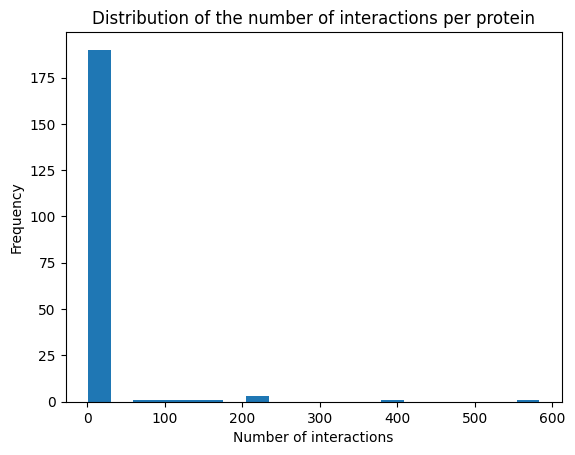

In [ ]:
import matplotlib.pyplot as plt

plt.hist(protein_interactions, bins=20)
plt.xlabel('Number of interactions')
plt.ylabel('Frequency')
plt.title('Distribution of the number of interactions per protein')
plt.show()

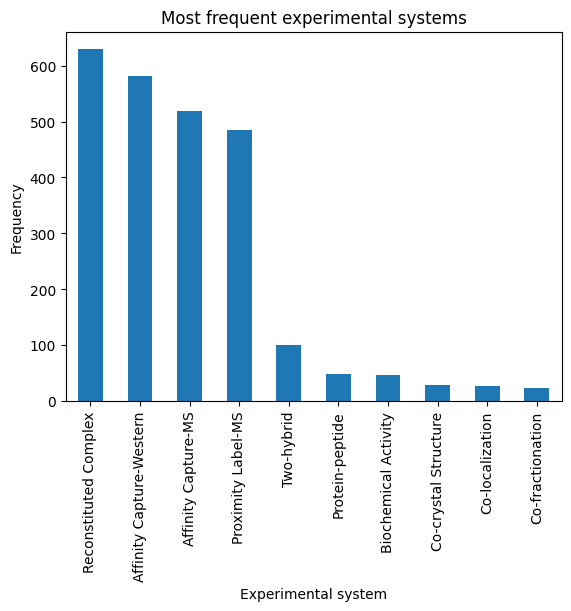

In [ ]:
experimental_systems[:10].plot(kind='bar')
plt.xlabel('Experimental system')
plt.ylabel('Frequency')
plt.title('Most frequent experimental systems')
plt.show()

In [ ]:
import networkx as nx

hiv_human_interactions = filtered_df[
    (
        (filtered_df['Organism Name Interactor A'] == 'Human Immunodeficiency Virus 1') &
        (filtered_df['Organism Name Interactor B'] == 'Homo sapiens')
    ) | (
        (filtered_df['Organism Name Interactor A'] == 'Homo sapiens') &
        (filtered_df['Organism Name Interactor B'] == 'Human Immunodeficiency Virus 1')
    )
]

if hiv_human_interactions.empty:
    print("Error: The dataframe for HIV-Human interactions is empty. Cannot create graph.")
else:
    graph = nx.from_pandas_edgelist(
        hiv_human_interactions,
        'Official Symbol Interactor A',
        'Official Symbol Interactor B',
        create_using=nx.Graph()
    )

centrality_measures = {
    "Node": list(graph.nodes()),
    "Degree": list(dict(graph.degree()).values()),
    "Degree Centrality": list(nx.degree_centrality(graph).values()),
    "Betweenness Centrality": list(nx.betweenness_centrality(graph).values()),
    "Closeness Centrality": list(nx.closeness_centrality(graph).values())
}

try:
    centrality_measures["Eigenvector Centrality"] = list(nx.eigenvector_centrality(graph, max_iter=500, tol=1e-4).values())
except nx.NetworkXError as e:
    print(f"Warning: Could not calculate Eigenvector centrality: {e}")

df_centrality = pd.DataFrame(centrality_measures)

df_centrality.head(10)

,Node,Degree,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
0,vpr,473,0.331001,0.494448,0.428872,0.650700
1,SF3B2,1,0.000700,0.000000,0.300210,0.028815
2,tat,334,0.233730,0.348567,0.395845,0.232084
3,CCNT1,2,0.001400,0.002129,0.341213,0.039093
4,SMARCA4,1,0.000700,0.000000,0.283644,0.010278
5,SMARCB1,2,0.001400,0.002544,0.297584,0.011622
6,WDR5,1,0.000700,0.000000,0.283644,0.010278
7,SUPT16H,2,0.001400,0.001075,0.305865,0.016157
8,ACTL6A,1,0.000700,0.000000,0.283644,0.010278
9,SMARCA5,2,0.001400,0.002129,0.341213,0.039093


In [ ]:
graph.remove_nodes_from(list(nx.isolates(graph)))

In [ ]:
graph.number_of_nodes()

1430

In [ ]:
bridges = list(nx.bridges(graph))
df_bridges = pd.DataFrame(bridges, columns=['Node 1', 'Node 2'])
display(df_bridges)

,Node 1,Node 2
0,vpr,SF3B2
1,vpr,TP53BP1
2,vpr,RPA2
3,vpr,UBD
4,vpr,UNG
...,...,...
1179,rev,LIG3
1180,rev,HIST1H4A
1181,rev,CSNK2A1
1182,rev,FEM1C


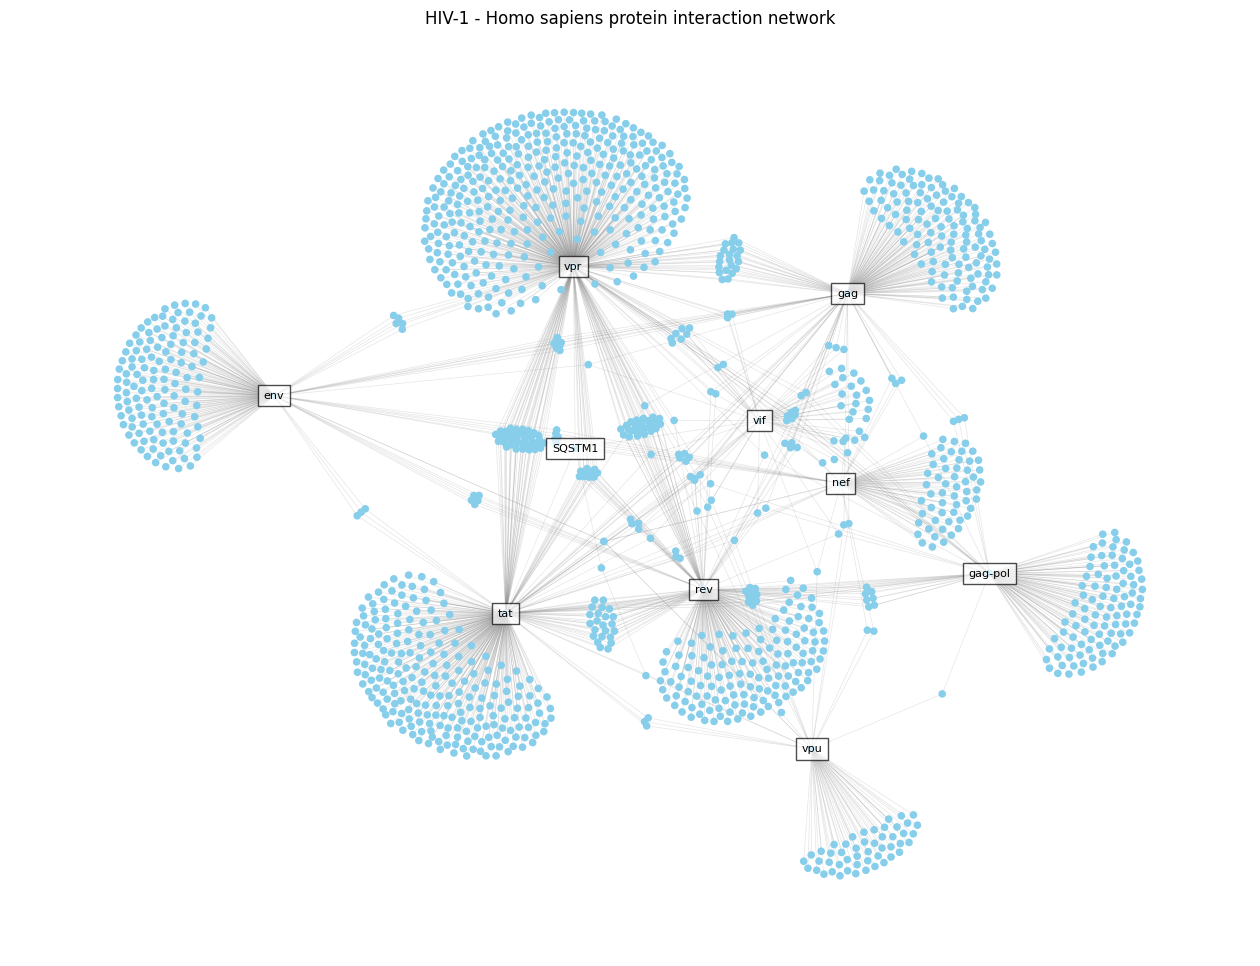

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

pos = nx.spring_layout(graph, k=0.05, iterations=200, seed=42)

node_sizes = [20 for _ in graph.nodes()]

edge_alpha = 0.2
edge_color = 'gray'
line_width = 0.5

centrality = nx.degree_centrality(graph)
top_n = 10
sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
top_nodes = [node for node, score in sorted_centrality[:top_n]]
labels = {node: node if node in top_nodes else '' for node in graph.nodes()}
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}

plt.figure(figsize=(16, 12))

nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color='skyblue')
nx.draw_networkx_edges(graph, pos, alpha=edge_alpha, edge_color=edge_color, width=line_width)
nx.draw_networkx_labels(graph, pos, labels=labels, font_size=8, bbox=label_options)

plt.title("HIV-1 - Homo sapiens protein interaction network")
plt.axis('off')
plt.show()

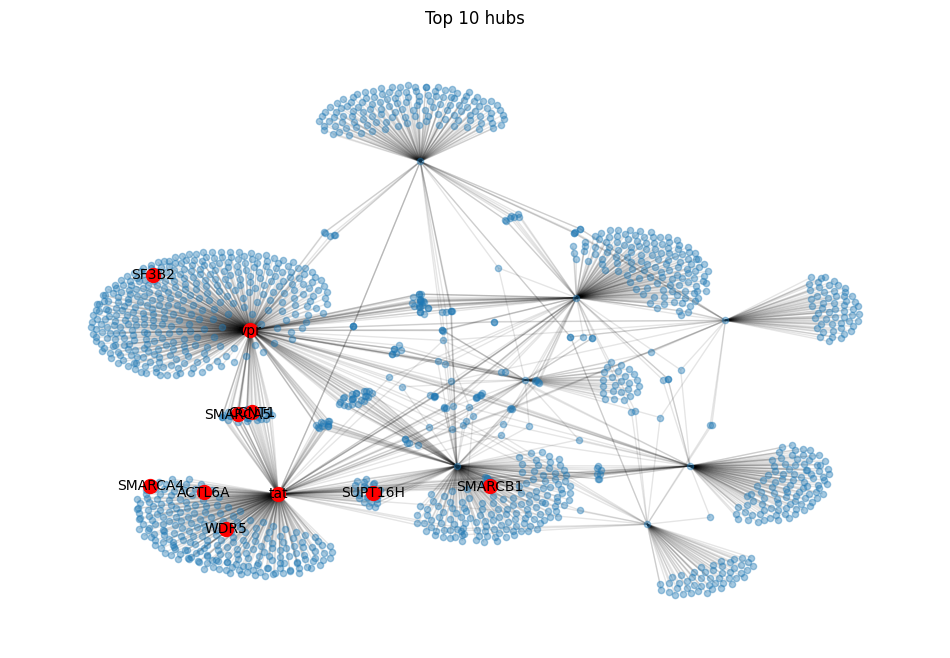

In [ ]:
top_hubs = df_centrality.head(10)["Node"].values

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx_nodes(graph, pos, node_size=20, alpha=0.4)
nx.draw_networkx_nodes(graph, pos, nodelist=top_hubs, node_color='red', node_size=100)
nx.draw_networkx_labels(graph, pos, labels={node: node for node in top_hubs}, font_size=10)
nx.draw_networkx_edges(graph, pos, alpha=0.1)
plt.title("Top 10 hubs")
plt.axis("off")
plt.show()

In [ ]:
!pip install gprofiler-official

In [ ]:
!pip install python-louvain

Detected 10 HIV proteins.
Detected 9 communities.


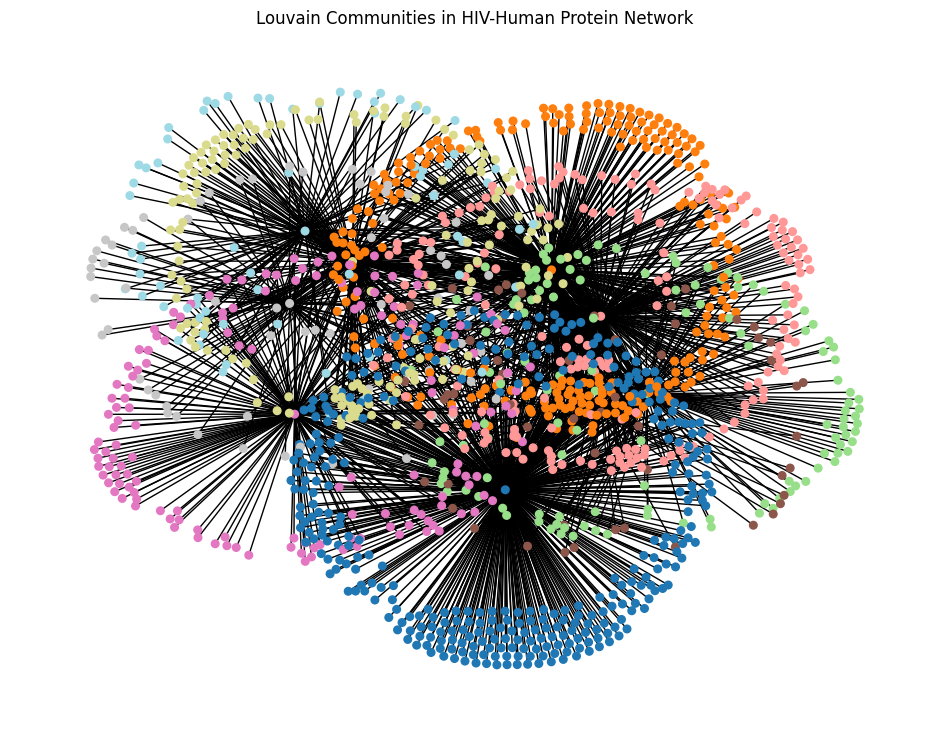


=== COMMUNITY 0 ===
Total nodes: 349, HIV proteins: 1, Human proteins: 348



🔵 Biological Processes (Top terms):
• DNA metabolic process (GO:0006259) - p=2.26e-13
• nucleobase-containing compound metabolic process (GO:0006139) - p=2.99e-13
• nucleic acid metabolic process (GO:0090304) - p=3.79e-13
• primary metabolic process (GO:0044238) - p=2.14e-12
• ribosome biogenesis (GO:0042254) - p=1.26e-11
• chromosome organization (GO:0051276) - p=9.95e-11
• rRNA processing (GO:0006364) - p=1.11e-10
• rRNA metabolic process (GO:0016072) - p=4.57e-10
• cell cycle (GO:0007049) - p=7.06e-10
• cell cycle process (GO:0022402) - p=2.13e-09

🔵 Cellular Components (Top terms):
• nucleoplasm (GO:0005654) - p=8.12e-54
• organelle lumen (GO:0043233) - p=1.50e-45
• membrane-enclosed lumen (GO:0031974) - p=1.50e-45
• intracellular organelle lumen (GO:0070013) - p=1.50e-45
• nuclear lumen (GO:0031981) - p=2.48e-45
• nucleus (GO:0005634) - p=5.96e-34
• intracellular organelle (GO:0043229) - p=2.68e-28
• intracellular membrane-bounded organelle (GO:0043231) - p=1.26e-26
• intracellul


🔵 Biological Processes (Top terms):
• chromatin remodeling (GO:0006338) - p=5.44e-45
• chromatin organization (GO:0006325) - p=4.97e-44
• DNA-templated transcription (GO:0006351) - p=2.99e-43
• regulation of nucleobase-containing compound metabolic process (GO:0019219) - p=1.42e-39
• transcription by RNA polymerase II (GO:0006366) - p=9.03e-36
• regulation of RNA metabolic process (GO:0051252) - p=8.61e-35
• regulation of RNA biosynthetic process (GO:2001141) - p=1.51e-33
• regulation of DNA-templated transcription (GO:0006355) - p=2.68e-32
• positive regulation of nucleobase-containing compound metabolic process (GO:0045935) - p=1.41e-30
• nucleic acid metabolic process (GO:0090304) - p=1.45e-29

🔵 Cellular Components (Top terms):
• nucleoplasm (GO:0005654) - p=3.09e-97
• nuclear lumen (GO:0031981) - p=1.86e-87
• membrane-enclosed lumen (GO:0031974) - p=6.60e-75
• intracellular organelle lumen (GO:0070013) - p=6.60e-75
• organelle lumen (GO:0043233) - p=6.60e-75
• chromosome (GO:0005


🔵 Biological Processes (Top terms):
• formation of cytoplasmic translation initiation complex (GO:0001732) - p=8.81e-22
• cytoplasmic translational initiation (GO:0002183) - p=9.02e-15
• protein metabolic process (GO:0019538) - p=4.13e-11
• translational initiation (GO:0006413) - p=2.44e-10
• cytoplasmic translation (GO:0002181) - p=5.39e-09
• viral translational termination-reinitiation (GO:0075525) - p=6.77e-09
• cellular response to stress (GO:0033554) - p=1.97e-07
• viral translation (GO:0019081) - p=1.75e-06
• response to stress (GO:0006950) - p=1.12e-05
• DNA damage response (GO:0006974) - p=1.82e-05

🔵 Cellular Components (Top terms):
• eukaryotic translation initiation factor 3 complex (GO:0005852) - p=1.00e-22
• eukaryotic 48S preinitiation complex (GO:0033290) - p=3.39e-22
• eukaryotic 43S preinitiation complex (GO:0016282) - p=1.01e-21
• translation preinitiation complex (GO:0070993) - p=2.74e-21
• cytosol (GO:0005829) - p=8.71e-19
• eukaryotic translation initiation factor


🔵 Biological Processes (Top terms):
• RNA processing (GO:0006396) - p=1.40e-16
• mRNA metabolic process (GO:0016071) - p=2.26e-14
• cytoplasmic translation (GO:0002181) - p=7.80e-14
• translation (GO:0006412) - p=9.03e-14
• ribosome biogenesis (GO:0042254) - p=1.60e-13
• regulation of mRNA metabolic process (GO:1903311) - p=8.53e-12
• mRNA processing (GO:0006397) - p=2.58e-11
• RNA splicing (GO:0008380) - p=4.83e-11
• nucleobase-containing compound metabolic process (GO:0006139) - p=1.84e-10
• regulation of RNA splicing (GO:0043484) - p=3.62e-10

🔵 Cellular Components (Top terms):
• nucleoplasm (GO:0005654) - p=1.38e-42
• nuclear lumen (GO:0031981) - p=1.52e-37
• membrane-enclosed lumen (GO:0031974) - p=1.24e-34
• intracellular organelle lumen (GO:0070013) - p=1.24e-34
• organelle lumen (GO:0043233) - p=1.24e-34
• spliceosomal complex (GO:0005681) - p=3.55e-27
• nucleus (GO:0005634) - p=7.67e-27
• protein-containing complex (GO:0032991) - p=1.25e-22
• catalytic step 2 spliceosome (GO:


🔵 Biological Processes (Top terms):
• protein modification by small protein conjugation (GO:0032446) - p=7.07e-16
• protein ubiquitination (GO:0016567) - p=1.50e-15
• protein modification by small protein conjugation or removal (GO:0070647) - p=1.21e-14
• proteolysis involved in protein catabolic process (GO:0051603) - p=1.34e-14
• post-translational protein modification (GO:0043687) - p=3.75e-14
• macromolecule modification (GO:0043412) - p=1.19e-13
• modification-dependent protein catabolic process (GO:0019941) - p=1.81e-13
• modification-dependent macromolecule catabolic process (GO:0043632) - p=2.04e-13
• catabolic process (GO:0009056) - p=4.41e-13
• protein metabolic process (GO:0019538) - p=1.30e-12

🔵 Cellular Components (Top terms):
• cytosol (GO:0005829) - p=3.59e-13
• nucleoplasm (GO:0005654) - p=4.31e-13
• catalytic complex (GO:1902494) - p=9.64e-13
• nucleus (GO:0005634) - p=1.50e-12
• nuclear lumen (GO:0031981) - p=2.26e-09
• ubiquitin ligase complex (GO:0000151) - p=3.43


🔵 Biological Processes (Top terms):
• protein maturation (GO:0051604) - p=6.06e-24
• protein folding (GO:0006457) - p=3.25e-21
• protein metabolic process (GO:0019538) - p=5.20e-13
• response to endoplasmic reticulum stress (GO:0034976) - p=7.83e-13
• response to stress (GO:0006950) - p=4.01e-11
• protein folding in endoplasmic reticulum (GO:0034975) - p=1.93e-10
• cellular localization (GO:0051641) - p=1.78e-09
• intracellular transport (GO:0046907) - p=5.60e-09
• transport (GO:0006810) - p=8.13e-09
• macromolecule localization (GO:0033036) - p=9.27e-09

🔵 Cellular Components (Top terms):
• endoplasmic reticulum (GO:0005783) - p=1.07e-36
• endomembrane system (GO:0012505) - p=1.09e-36
• organelle membrane (GO:0031090) - p=7.65e-26
• endoplasmic reticulum lumen (GO:0005788) - p=9.62e-26
• endoplasmic reticulum protein-containing complex (GO:0140534) - p=6.81e-24
• organelle subcompartment (GO:0031984) - p=1.67e-22
• endoplasmic reticulum membrane (GO:0005789) - p=1.85e-22
• endoplasmi


🔵 Biological Processes (Top terms):
• macromolecule localization (GO:0033036) - p=3.66e-05
• organelle organization (GO:0006996) - p=7.87e-05
• cellular localization (GO:0051641) - p=1.10e-04
• protein localization (GO:0008104) - p=1.64e-04
• cellular macromolecule localization (GO:0070727) - p=1.77e-04
• macromolecule catabolic process (GO:0009057) - p=9.99e-04
• catabolic process (GO:0009056) - p=1.07e-03
• ubiquitin-dependent protein catabolic process (GO:0006511) - p=1.44e-03
• localization (GO:0051179) - p=1.68e-03
• modification-dependent protein catabolic process (GO:0019941) - p=1.69e-03

🔵 Cellular Components (Top terms):
• cytoplasm (GO:0005737) - p=3.41e-09
• endomembrane system (GO:0012505) - p=3.81e-08
• organelle membrane (GO:0031090) - p=4.51e-08
• bounding membrane of organelle (GO:0098588) - p=4.00e-05
• intracellular membrane-bounded organelle (GO:0043231) - p=1.48e-04
• perinuclear region of cytoplasm (GO:0048471) - p=1.01e-03
• membrane (GO:0016020) - p=1.72e-03
• 


🔵 Biological Processes (Top terms):
• translation (GO:0006412) - p=1.27e-27
• cytoplasmic translation (GO:0002181) - p=1.20e-15
• regulation of translation (GO:0006417) - p=5.63e-14
• viral process (GO:0016032) - p=7.84e-14
• viral life cycle (GO:0019058) - p=2.32e-13
• protein metabolic process (GO:0019538) - p=9.89e-13
• translational initiation (GO:0006413) - p=6.48e-12
• regulation of translational initiation (GO:0006446) - p=2.72e-10
• regulation of protein metabolic process (GO:0051246) - p=1.49e-08
• regulation of viral life cycle (GO:1903900) - p=1.87e-08

🔵 Cellular Components (Top terms):
• cytosol (GO:0005829) - p=1.13e-26
• cytosolic ribosome (GO:0022626) - p=3.80e-16
• ribonucleoprotein granule (GO:0035770) - p=1.07e-15
• cytoplasmic ribonucleoprotein granule (GO:0036464) - p=4.60e-15
• cytoplasm (GO:0005737) - p=6.01e-13
• extracellular exosome (GO:0070062) - p=1.44e-12
• ribosomal subunit (GO:0044391) - p=1.90e-12
• extracellular vesicle (GO:1903561) - p=2.21e-12
• extr


🔵 Biological Processes (Top terms):
• transport (GO:0006810) - p=3.23e-08
• apoptotic process (GO:0006915) - p=8.82e-08
• localization (GO:0051179) - p=1.34e-07
• programmed cell death (GO:0012501) - p=1.76e-07
• cell death (GO:0008219) - p=1.85e-07
• ephrin receptor signaling pathway (GO:0048013) - p=4.19e-07
• negative regulation of inflammatory response to antigenic stimulus (GO:0002862) - p=4.96e-07
• Fc receptor signaling pathway (GO:0038093) - p=8.28e-07
• regulation of programmed cell death (GO:0043067) - p=9.88e-07
• Fc-gamma receptor signaling pathway (GO:0038094) - p=1.18e-06

🔵 Cellular Components (Top terms):
• vesicle (GO:0031982) - p=1.13e-11
• cytoplasm (GO:0005737) - p=1.11e-09
• extrinsic component of cytoplasmic side of plasma membrane (GO:0031234) - p=1.25e-08
• endomembrane system (GO:0012505) - p=2.56e-08
• cytoplasmic side of plasma membrane (GO:0009898) - p=2.95e-08
• vacuole (GO:0005773) - p=1.21e-07
• cell junction (GO:0030054) - p=1.33e-07
• cytoplasmic side 

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import community.community_louvain as community_louvain
from collections import defaultdict
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)

def get_hiv_proteins(df):
    hiv_proteins = set()
    for _, row in df.iterrows():
        if row['Organism Name Interactor A'] == 'Human Immunodeficiency Virus 1':
            hiv_proteins.add(row['Official Symbol Interactor A'].lower())
        if row['Organism Name Interactor B'] == 'Human Immunodeficiency Virus 1':
            hiv_proteins.add(row['Official Symbol Interactor B'].lower())
    return hiv_proteins


hiv_proteins_set = get_hiv_proteins(hiv_human_interactions)
print(f"Detected {len(hiv_proteins_set)} HIV proteins.")

partition = community_louvain.best_partition(graph)
communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)

print(f"Detected {len(communities)} communities.")

pos = nx.spring_layout(graph, k=0.3, iterations=100, seed=42)

plt.figure(figsize=(12, 9))
colors = [partition[node] for node in graph.nodes()]
nx.draw_networkx(graph, pos=pos, node_color=colors, with_labels=False, node_size=30, cmap=plt.cm.tab20)
plt.title("Louvain Communities in HIV-Human Protein Network")
plt.axis('off')
plt.show()

source_names = {
    'GO:BP': 'Biological Processes',
    'GO:MF': 'Molecular Functions',
    'GO:CC': 'Cellular Components',
}

for comm_id, nodes in communities.items():
    subgraph = graph.subgraph(nodes)
    hiv_nodes = [n for n in nodes if n.lower() in hiv_proteins_set]
    human_nodes = [n for n in nodes if n.lower() not in hiv_proteins_set]

    print(f"\n=== COMMUNITY {comm_id} ===")
    print(f"Total nodes: {len(nodes)}, HIV proteins: {len(hiv_nodes)}, Human proteins: {len(human_nodes)}")

    edge_x, edge_y = [], []
    for u, v in subgraph.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x, node_y, colors, labels = [], [], [], []
    for node in nodes:
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        if node.lower() in hiv_proteins_set:
            colors.append('red')
        else:
            colors.append('blue')
        labels.append(node)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=labels,
        textposition='top center',
        hoverinfo='text',
        marker=dict(
            showscale=False,
            color=colors,
            size=10,
            line_width=2))

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=f'Community {comm_id} Visualization',
                        showlegend=False,
                        hovermode='closest',
                        height=500,
                        width=800,
                        margin=dict(b=20,l=5,r=5,t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False))
                    )
    fig.show()

    try:
        enrich = gp.profile(
            organism='hsapiens',
            query=human_nodes,
            sources=['GO:BP', 'GO:MF', 'GO:CC']
        )
    except Exception as e:
        print(f"gProfiler error: {e}")
        enrich = pd.DataFrame()

    if not enrich.empty:
        enrich = enrich[['name', 'native', 'source', 'p_value']]
        grouped = enrich.groupby('source')

        for source_code, group in grouped:
            readable_name = source_names.get(source_code, source_code)
            group = group.sort_values(by='p_value')

            print(f"\n🔵 {readable_name} (Top terms):")
            for idx, row in group.head(10).iterrows():
                print(f"• {row['name']} ({row['native']}) - p={row['p_value']:.2e}")
    else:
        print("\n- No significant enrichment found.")

In [ ]:
#filtered_df.to_csv('filtered_data.csv', index=False)

In [ ]:
import requests

#df = pd.read_csv('/content/filtered_data.csv')

#DGRAPH_ENDPOINT = "https://nameless-brook-700032.eu-central-1.aws.cloud.dgraph.io/graphql"
#DGRAPH_TOKEN = "ZTQ2MTIyNTlhNDMwOTRkZWU4NTIzMWViODllMDU0MmM="

headers = {
    "Content-Type": "application/json",
    "X-Auth-Token": DGRAPH_TOKEN
}

BATCH_SIZE = 100
all_mutations = []

for batch_start in range(0, len(df), BATCH_SIZE):
    batch_df = df.iloc[batch_start: batch_start + BATCH_SIZE]
    mutation_blocks = []

    for index, row in batch_df.iterrows():
        source_id = row['Official Symbol Interactor A']
        target_id = row['Official Symbol Interactor B']
        experimental = str(row.get('Experimental System Type', '')).replace('"', '\\"')
        publication = str(row.get('Source Database', '')).replace('"', '\\"')

        mutation = f"""
        addInteraction{index}: addInteraction(input: [{{
            source: {{ id: "{source_id}" }},
            target: {{ id: "{target_id}" }},
            experimentalSystemType: "{experimental}",
            publicationIdentifiers: "{publication}"
        }}]) {{
            interaction {{ experimentalSystemType }}
        }}"""
        mutation_blocks.append(mutation)

    mutation_string = "mutation {\n" + "\n".join(mutation_blocks) + "\n}"

    response = requests.post(DGRAPH_ENDPOINT, json={"query": mutation_string}, headers=headers)

    print(f"Batch {batch_start}-{batch_start+len(batch_df)} → Status:", response.status_code)
    if response.status_code != 200:
        print("Error:", response.text)


Batch 0-100 → Status: 200
Batch 100-200 → Status: 200
Batch 200-300 → Status: 200
Batch 300-400 → Status: 200
Batch 400-500 → Status: 200
Batch 500-600 → Status: 200
Batch 600-700 → Status: 200
Batch 700-800 → Status: 200
Batch 800-900 → Status: 200
Batch 900-1000 → Status: 200
Batch 1000-1100 → Status: 200
Batch 1100-1200 → Status: 200
Batch 1200-1300 → Status: 200
Batch 1300-1400 → Status: 200
Batch 1400-1500 → Status: 200
Batch 1500-1600 → Status: 200
Batch 1600-1700 → Status: 200
Batch 1700-1800 → Status: 200
Batch 1800-1900 → Status: 200
Batch 1900-2000 → Status: 200
Batch 2000-2100 → Status: 200
Batch 2100-2200 → Status: 200
Batch 2200-2300 → Status: 200
Batch 2300-2400 → Status: 200
Batch 2400-2500 → Status: 200
Batch 2500-2555 → Status: 200


In [ ]:
import sys
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [ ]:
import torch
print(torch.__version__)

2.6.0+cu124


In [ ]:
!pip install torch_geometric==2.6.0 torch_scatter==2.1.2 torch_sparse==0.6.18 torch_cluster==1.6.3 torch_spline_conv==1.2.2+pt26cu118 -f https://data.pyg.org/whl/torch-2.6.0+cu118.html

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.6/952.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.1 MB/s eta 0:00:00


In [ ]:
import torch
from torch_geometric.utils import from_networkx
import networkx as nx
import pandas as pd
import numpy as np

df_centrality_indexed = df_centrality.set_index('Node')

for node in graph.nodes():
    if node in df_centrality_indexed.index:
        features = df_centrality_indexed.loc[node].values.astype(np.float32)
        graph.nodes[node]['x'] = features
    else:
        print(f"Warning: Node '{node}' not found in df_centrality index. Cannot assign features.")

print("Centrality features assigned as 'x' attribute to graph nodes.")

hiv_nodes = ['vpr', 'gag-pol', 'nef', 'tat', 'env', 'vpu', 'rev', 'gag', 'asp', 'vif']

for node in graph.nodes():
    if isinstance(node, str) and node.lower() in hiv_nodes:
        graph.nodes[node]['y'] = torch.tensor(1)
    else:
        graph.nodes[node]['y'] = torch.tensor(0)

print("Labels assigned as 'y' attribute to graph nodes.")

data = from_networkx(graph)

print(f"PyG Data object created successfully: {data}")
print(f"Data.x (features) shape: {data.x.shape}")
print(f"Data.y (labels) shape: {data.y.shape}")
print(f"Data.edge_index (edges) shape: {data.edge_index.shape}")
print("Labels distribution in data.y:", torch.bincount(data.y))

labels = data.y
class_sample_count = torch.tensor([(labels == t).sum() for t in torch.unique(labels, sorted=True)])
class_weights = 1. / class_sample_count.float()
class_weights[torch.isinf(class_weights)] = 0

criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

print("Data preparation complete.")

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning:

An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning:

An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning:

An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning:

An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory



Centrality features assigned as 'x' attribute to graph nodes.
Labels assigned as 'y' attribute to graph nodes.
PyG Data object created successfully: Data(x=[1430, 5], edge_index=[2, 3416], y=[1430])
Data.x (features) shape: torch.Size([1430, 5])
Data.y (labels) shape: torch.Size([1430])
Data.edge_index (edges) shape: torch.Size([2, 3416])
Labels distribution in data.y: tensor([1420,   10])
Data preparation complete.


/usr/local/lib/python3.11/dist-packages/torch_geometric/utils/convert.py:278: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)



In [ ]:
import scipy.sparse as sp
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_scipy_sparse_matrix
from sklearn.model_selection import train_test_split

x = data.x
edge_index = data.edge_index
num_nodes = x.size(0)

adj = to_scipy_sparse_matrix(edge_index, num_nodes=num_nodes)


edges = edge_index.t().cpu().numpy()
edges = np.unique(edges, axis=0)

train_edges, test_edges = train_test_split(edges, test_size=0.2, random_state=42)
val_edges, test_edges = train_test_split(test_edges, test_size=0.5, random_state=42)

In [ ]:
def sample_balanced_false_edges(num_samples, num_nodes, existing_edges_set, hiv_indices, hiv_ratio=0.5):
    num_hiv_neg = int(num_samples * hiv_ratio)
    num_other_neg = num_samples - num_hiv_neg

    false_edges = set()

    while len(false_edges) < num_hiv_neg:
        i = np.random.choice(list(hiv_indices))
        j = np.random.randint(0, num_nodes)
        if i == j or (i, j) in existing_edges_set or (j, i) in existing_edges_set:
            continue
        false_edges.add((i, j))

    while len(false_edges) < num_samples:
        i = np.random.randint(0, num_nodes)
        j = np.random.randint(0, num_nodes)
        if i in hiv_indices or j in hiv_indices:
            continue
        if i == j or (i, j) in existing_edges_set or (j, i) in existing_edges_set:
            continue
        false_edges.add((i, j))

    return np.array(list(false_edges))

hiv_indices = set((data.y == 1).nonzero(as_tuple=True)[0].tolist())
edge_set = set(map(tuple, edge_index.t().numpy()))

train_edges_false = sample_balanced_false_edges(len(train_edges), num_nodes, edge_set, hiv_indices)
val_edges_false = sample_balanced_false_edges(len(val_edges), num_nodes, edge_set, hiv_indices)
test_edges_false = sample_balanced_false_edges(len(test_edges), num_nodes, edge_set, hiv_indices)

def normalize_adjacency(mx):
    mx = sp.coo_matrix(mx)
    rowsum = np.array(mx.sum(1)).flatten()
    d_inv_sqrt = np.power(rowsum, -0.5, where=rowsum!=0)
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return (d_mat_inv_sqrt @ mx @ d_mat_inv_sqrt).tocoo()

adj_train = sp.coo_matrix((np.ones(train_edges.shape[0]),
                           (train_edges[:, 0], train_edges[:, 1])),
                          shape=(num_nodes, num_nodes))
adj_train = adj_train + adj_train.T.multiply(adj_train.T > adj_train) - adj_train.multiply(adj_train.T > adj_train)
adj_train_norm = normalize_adjacency(adj_train)
adj_train_norm = torch.FloatTensor(adj_train_norm.toarray())

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class GCNEncoder(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super(GCNEncoder, self).__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x, adj):
        x = F.relu(self.fc1(torch.matmul(adj, x)))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc2(torch.matmul(adj, x))
        return x

def decode(z, edges):
    return torch.sigmoid((z[edges[:, 0]] * z[edges[:, 1]]).sum(dim=1))

def compute_loss(z, pos_edges, neg_edges):
    pos_score = decode(z, pos_edges)
    neg_score = decode(z, neg_edges)
    labels = torch.cat([torch.ones_like(pos_score), torch.zeros_like(neg_score)])
    scores = torch.cat([pos_score, neg_score])
    return F.binary_cross_entropy(scores, labels)

features = x.float().to(device)
adj_train_norm = adj_train_norm.to(device)
train_edges = torch.tensor(train_edges, dtype=torch.long).to(device)
val_edges = torch.tensor(val_edges, dtype=torch.long).to(device)
test_edges = torch.tensor(test_edges, dtype=torch.long).to(device)
train_edges_false = torch.tensor(train_edges_false, dtype=torch.long).to(device)
val_edges_false = torch.tensor(val_edges_false, dtype=torch.long).to(device)
test_edges_false = torch.tensor(test_edges_false, dtype=torch.long).to(device)

model = GCNEncoder(features.shape[1], 64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    z = model(features, adj_train_norm)
    loss = compute_loss(z, train_edges, train_edges_false)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        model.eval()
        with torch.no_grad():
            z = model(features, adj_train_norm)
            val_loss = compute_loss(z, val_edges, val_edges_false)
            print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

<ipython-input-37-802000ba4af2>:30: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-37-802000ba4af2>:31: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-37-802000ba4af2>:32: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch 20, Loss: 25.0721, Val Loss: 27.5988
Epoch 40, Loss: 22.7800, Val Loss: 26.2352
Epoch 60, Loss: 26.1706, Val Loss: 26.5125
Epoch 80, Loss: 25.0793, Val Loss: 25.2554
Epoch 100, Loss: 24.3328, Val Loss: 29.8025
Epoch 120, Loss: 25.2288, Val Loss: 27.3665
Epoch 140, Loss: 22.6334, Val Loss: 25.2949
Epoch 160, Loss: 26.3014, Val Loss: 26.4282
Epoch 180, Loss: 24.7363, Val Loss: 25.6455
Epoch 200, Loss: 14.3479, Val Loss: 17.0599


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

model.eval()
with torch.no_grad():
    z = model(features, adj_train_norm)
    test_score = decode(z, test_edges)
    test_score_false = decode(z, test_edges_false)

    y_true = np.concatenate([np.ones(len(test_score)), np.zeros(len(test_score_false))])
    y_scores = torch.cat([test_score, test_score_false]).cpu().numpy()

    auc = roc_auc_score(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    print(f"\nTest AUC: {auc:.4f}, AP: {ap:.4f}")


Test AUC: 0.7770, AP: 0.7605


In [ ]:
def filter_edges_containing_hiv(edges, hiv_indices):
    if isinstance(edges, torch.Tensor):
        edges = edges.cpu().numpy()
    filtered = [edge for edge in edges if edge[0] in hiv_indices or edge[1] in hiv_indices]
    return np.array(filtered)

def evaluate(z, pos_edges, neg_edges):
    """Evaluates the link prediction model using AUC and Average Precision."""
    pos_edges = pos_edges.to(z.device)
    neg_edges = neg_edges.to(z.device)

    with torch.no_grad():
        pos_scores = decode(z, pos_edges)
        neg_scores = decode(z, neg_edges)

        y_true = torch.cat([torch.ones_like(pos_scores), torch.zeros_like(neg_scores)]).cpu().numpy()
        y_scores = torch.cat([pos_scores, neg_scores]).cpu().numpy()

        if len(y_true) == 0:
             return float('nan'), float('nan')

        auc = roc_auc_score(y_true, y_scores) if len(np.unique(y_true)) > 1 else float('nan')
        ap = average_precision_score(y_true, y_scores) if len(np.unique(y_true)) > 1 else float('nan')

    return auc, ap


hiv_test_edges_np = filter_edges_containing_hiv(test_edges.cpu().numpy(), hiv_indices)
hiv_test_edges_false_np = filter_edges_containing_hiv(test_edges_false.cpu().numpy(), hiv_indices)

hiv_test_edges = torch.tensor(hiv_test_edges_np, dtype=torch.long).to(device)
hiv_test_edges_false = torch.tensor(hiv_test_edges_false_np, dtype=torch.long).to(device)

if len(hiv_test_edges) > 0 or len(hiv_test_edges_false) > 0:
    hiv_auc, hiv_ap = evaluate(z, hiv_test_edges, hiv_test_edges_false)
    print(f"HIV-focused Test AUC: {hiv_auc:.4f}, AP: {hiv_ap:.4f}")

HIV-focused Test AUC: 0.6680, AP: 0.7796


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, average_precision_score
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class GCNEncoder(nn.Module):
    def __init__(self, in_dim, hidden_dim, dropout):
        super(GCNEncoder, self).__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.fc1(torch.matmul(adj, x)))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.fc2(torch.matmul(adj, x))
        return x

def decode(z, edges):
    return torch.sigmoid((z[edges[:, 0]] * z[edges[:, 1]]).sum(dim=1))

def compute_loss(z, pos_edges, neg_edges):
    pos_score = decode(z, pos_edges)
    neg_score = decode(z, neg_edges)
    labels = torch.cat([torch.ones_like(pos_score), torch.zeros_like(neg_score)])
    scores = torch.cat([pos_score, neg_score])
    return F.binary_cross_entropy(scores, labels)

def evaluate(model, features, adj, pos_edges, neg_edges):
    model.eval()
    with torch.no_grad():
        z = model(features, adj)
        pos_score = decode(z, pos_edges).cpu().numpy()
        neg_score = decode(z, neg_edges).cpu().numpy()
        labels = np.hstack([np.ones(len(pos_score)), np.zeros(len(neg_score))])
        scores = np.hstack([pos_score, neg_score])
        auc = roc_auc_score(labels, scores)
        ap = average_precision_score(labels, scores)
    return auc, ap

learning_rates = [0.01, 0.005, 0.001]
hidden_dims = [32, 64, 128]
dropouts = [0.3, 0.5]

best_val_auc = 0
best_params = None
best_model_state = None

features = features.to(device)
adj_train_norm = adj_train_norm.to(device)
train_edges = train_edges.to(device)
val_edges = val_edges.to(device)
train_edges_false = train_edges_false.to(device)
val_edges_false = val_edges_false.to(device)

for lr in learning_rates:
    for hidden_dim in hidden_dims:
        for dropout in dropouts:
            print(f"Training with lr={lr}, hidden_dim={hidden_dim}, dropout={dropout}")
            model = GCNEncoder(features.shape[1], hidden_dim, dropout).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)

            epochs = 100
            for epoch in range(epochs):
                model.train()
                optimizer.zero_grad()
                z = model(features, adj_train_norm)
                loss = compute_loss(z, train_edges, train_edges_false)
                loss.backward()
                optimizer.step()

            val_auc, val_ap = evaluate(model, features, adj_train_norm, val_edges, val_edges_false)
            print(f"Val AUC: {val_auc:.4f}, Val AP: {val_ap:.4f}\n")

            if val_auc > best_val_auc:
                best_val_auc = val_auc
                best_params = {'lr': lr, 'hidden_dim': hidden_dim, 'dropout': dropout}
                best_model_state = model.state_dict()

print(f"Best params: {best_params}")
print(f"Best validation AUC: {best_val_auc:.4f}")

final_model = GCNEncoder(features.shape[1], best_params['hidden_dim'], best_params['dropout']).to(device)

final_model.load_state_dict(best_model_state)

test_auc, test_ap = evaluate(final_model, features, adj_train_norm, test_edges, test_edges_false)
print(f"Test AUC: {test_auc:.4f}, Test AP: {test_ap:.4f}")

Training with lr=0.01, hidden_dim=32, dropout=0.3
Val AUC: 0.8342, Val AP: 0.8210

Training with lr=0.01, hidden_dim=32, dropout=0.5
Val AUC: 0.7478, Val AP: 0.6647

Training with lr=0.01, hidden_dim=64, dropout=0.3
Val AUC: 0.7477, Val AP: 0.6646

Training with lr=0.01, hidden_dim=64, dropout=0.5
Val AUC: 0.6675, Val AP: 0.6323

Training with lr=0.01, hidden_dim=128, dropout=0.3
Val AUC: 0.7471, Val AP: 0.6641

Training with lr=0.01, hidden_dim=128, dropout=0.5
Val AUC: 0.6524, Val AP: 0.6183

Training with lr=0.005, hidden_dim=32, dropout=0.3
Val AUC: 0.8310, Val AP: 0.8156

Training with lr=0.005, hidden_dim=32, dropout=0.5
Val AUC: 0.8596, Val AP: 0.8188

Training with lr=0.005, hidden_dim=64, dropout=0.3
Val AUC: 0.7608, Val AP: 0.7789

Training with lr=0.005, hidden_dim=64, dropout=0.5
Val AUC: 0.7621, Val AP: 0.6777

Training with lr=0.005, hidden_dim=128, dropout=0.3
Val AUC: 0.6675, Val AP: 0.6323

Training with lr=0.005, hidden_dim=128, dropout=0.5
Val AUC: 0.6675, Val AP: 0.